# Libraries

In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib
import mpl_toolkits

from sklearn import linear_model
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from numpy.linalg import det, inv, pinv

# Functions

In [2]:
def transform_matrix(df_input, df_output,intercept=True):
    X = df_input
    Y = df_output

    model = linear_model.LinearRegression(fit_intercept=intercept).fit(X,Y)
    A = model.coef_
    n = model.intercept_
    score = round(model.score(X, Y),2)
        
    return np.array(A), np.array(n), np.array(score)

def multilineal_regressor(v_input, matrix):
    X = v_input.T
    A = matrix
    try:  
        Y =  inv(A.T.dot(A)).dot(A.T).dot(X)
    except:
        Y = pinv(A.T.dot(A)).dot(A.T).dot(X)
    return Y

def plot_prediction_error(sample, reference, prediction):
    figure_size = (6,4)
    fig = plt.figure(figsize=figure_size)
    plt.xlabel('sample')
    plt.ylabel(f'intensity')
    plt.plot(sample, label='sample', color='red')
    plt.plot(reference, label='reference', color='lime')
    plt.plot(prediction, label='prediction', color='yellow')
    plt.hlines(0, 0, len(reference))
    plt.legend()
    
    plt.figure(figsize=figure_size)
    #plt.title(''.join(reference.columns.tolist()) + f' - {coord}')
    plt.xlabel('reference')
    plt.ylabel('sample')
    plt.scatter(reference, sample, color='red')
    plt.plot(reference, reference, color='white')
    plt.xlim(min(min(reference), min(sample)),
             max(max(reference), max(sample)))
    plt.ylim(min(min(reference), min(sample)),
             max(max(reference), max(sample)))
    
    plt.figure(figsize=figure_size)
    #plt.title(''.join(reference.columns.tolist()) + f' - {coord}')
    plt.xlabel('reference')
    plt.ylabel('prediction')
    plt.scatter(reference, prediction, color='green')
    plt.plot(reference, reference, color='white')
    plt.xlim(min(min(reference), min(prediction)),
             max(max(reference), max(prediction)))
    plt.ylim(min(min(reference), min(prediction)),
             max(max(reference), max(prediction)))
    
    
def plot_sample_errorR(sample, error):
    figure_size = (6,4)
    plt.figure(figsize=figure_size)
    plt.xlabel('sample')
    plt.ylabel('error')
    plt.scatter(sample, error, color='red')
def plot_sample_errorG(sample, error):
    figure_size = (6,4)
    plt.figure(figsize=figure_size)
    plt.xlabel('sample')
    plt.ylabel('error')
    plt.scatter(sample, error, color='green')  
def plot_sample_errorB(sample, error):
    figure_size = (6,4)
    plt.figure(figsize=figure_size)
    plt.xlabel('sample')
    plt.ylabel('error')
    plt.scatter(sample, error, color='blue')   
    
    
def plot_prediction_errorR(prediction, error):
    figure_size = (6,4)
    plt.figure(figsize=figure_size)
    plt.xlabel('prediction')
    plt.ylabel('error')
    plt.scatter(prediction, error, color='red')
def plot_prediction_errorG(prediction, error):
    figure_size = (6,4)
    plt.figure(figsize=figure_size)
    plt.xlabel('prediction')
    plt.ylabel('error')
    plt.scatter(prediction, error, color='green') 
def plot_prediction_errorB(prediction, error):
    figure_size = (6,4)
    plt.figure(figsize=figure_size)
    plt.xlabel('prediction')
    plt.ylabel('error')
    plt.scatter(prediction, error, color='blue')

# Data

In [3]:
url = 'https://raw.githubusercontent.com/lpsienes/color_reproducibility_for_smartphones/main/RGB.csv'
url2 = 'https://raw.githubusercontent.com/lpsienes/color_reproducibility_for_smartphones/main/RGB2.csv'
rgb = pd.read_csv(url, sep=';')
rgb2 = pd.read_csv(url2', sep=';')

## RGB & RGB2 Values

In [4]:
display(rgb, rgb2)
display(rgb2.to_numpy()-rgb.to_numpy())

,R,G,B
0,222,218,138
1,233,205,141
2,231,208,100
3,253,243,201
4,186,171,132
5,179,176,95
6,252,188,39
7,248,92,54
8,202,4,5
9,197,4,11


,R,G,B
0,202.081557,181.682362,128.060014
1,204.241453,171.769425,126.431581
2,207.301761,166.016873,104.929110
3,228.104200,208.239544,178.465140
4,163.938907,140.654004,116.715755
5,160.813355,140.130436,93.810744
6,230.784748,151.754790,72.154124
7,207.728206,90.734215,64.179945
8,161.591541,31.130920,24.162888
9,155.017449,18.200254,21.582083


array([[-19.9184431 , -36.3176384 ,  -9.9399857 ],
       [-28.7585468 , -33.2305747 , -14.5684185 ],
       [-23.6982393 , -41.9831267 ,   4.9291097 ],
       [-24.8957999 , -34.760456  , -22.5348597 ],
       [-22.0610929 , -30.3459961 , -15.2842446 ],
       [-18.1866449 , -35.8695644 ,  -1.18925552],
       [-21.215252  , -36.2452101 ,  33.15412446],
       [-40.2717943 ,  -1.2657853 ,  10.17994514],
       [-40.4084587 ,  27.13091993,  19.16288831],
       [-41.9825514 ,  14.20025444,  10.58208301],
       [-38.0920239 ,   1.83985737,   0.39338606],
       [-22.7169842 ,  16.3432023 ,   8.66467319],
       [-18.30619907,  19.7237507 ,  -8.49257974],
       [-12.7182597 ,   6.59419029, -14.01837763],
       [-23.5516788 ,   1.39647686,  -7.748741  ],
       [-32.2467695 ,  17.06402061,  -6.85139442],
       [-35.2175152 , -18.7757906 , -19.9196463 ],
       [-41.6115264 ,   5.76486895,   7.04430469],
       [-46.5180104 , -15.8537107 , -20.1432489 ],
       [-37.9495527 , -16.89015

## Sample Error

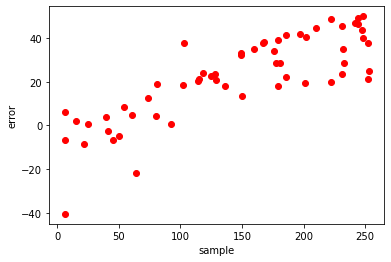

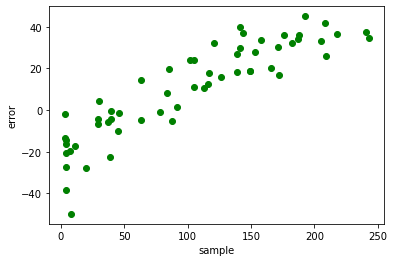

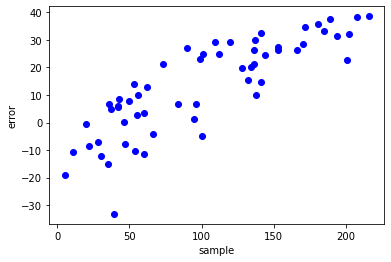

In [5]:
plot_sample_errorR(rgb.R, rgb.R-rgb2.R)
plot_sample_errorG(rgb.G, rgb.G-rgb2.G)
plot_sample_errorB(rgb.B, rgb.B-rgb2.B)

# Results

## Matrix equation for coordinates change RGB-RGB': $A·x + n = y$

In [6]:
A, n, score_rgb = transform_matrix(rgb, rgb2, intercept=True)
display(A, n, score_rgb)

array([[ 0.79553585,  0.15532704, -0.10468706],
       [ 0.07567958,  0.66599249,  0.0896365 ],
       [ 0.08361469,  0.07184519,  0.6855309 ]])

array([ 2.20742999,  3.90622131, -0.98832055])

array(0.99)

In [7]:
v = A.dot(rgb.T).T
predictions = pd.DataFrame(v, columns=['R', 'G', 'B'])
display(predictions)
display(predictions.to_numpy()-rgb2.to_numpy())

,R,G,B
0,196.023439,174.357068,128.827976
1,202.441021,166.800550,130.870343
2,205.608100,164.972072,102.811882
3,217.972942,199.000047,176.404608
4,160.711900,139.793137,118.327938
5,159.793206,139.276791,92.737218
6,225.593722,147.773667,61.313502
7,205.929877,84.880217,64.364869
8,160.796115,18.399428,20.605203
9,156.190313,18.558849,24.300315


array([[-6.05811744e+00, -7.32529382e+00,  7.67961982e-01],
       [-1.80043210e+00, -4.96887499e+00,  4.43876164e+00],
       [-1.69366079e+00, -1.04480135e+00, -2.11722726e+00],
       [-1.01312579e+01, -9.23949714e+00, -2.06053226e+00],
       [-3.22700679e+00, -8.60867168e-01,  1.61218282e+00],
       [-1.02014938e+00, -8.53644141e-01, -1.07352644e+00],
       [-5.19102552e+00, -3.98112331e+00, -1.08406221e+01],
       [-1.79832838e+00, -5.85399801e+00,  1.84923919e-01],
       [-7.95426785e-01, -1.27314919e+01, -3.55768558e+00],
       [ 1.17286432e+00,  3.58594688e-01,  2.71823166e+00],
       [ 2.11428661e+00,  1.16650199e+01,  7.58003549e+00],
       [-4.52284170e+00, -6.24728152e+00, -4.84377634e+00],
       [-5.96339847e+00, -1.04881162e+01,  4.00202316e+00],
       [-3.45601732e+00, -5.92938427e+00,  5.62251284e+00],
       [-7.09041475e-01, -2.59201059e+00,  6.03284498e+00],
       [-2.78525536e-01, -6.23493137e+00,  8.77939275e+00],
       [-2.47438206e+00, -1.96019272e+00

# RGB to RGB´ Error

## Red Value Error

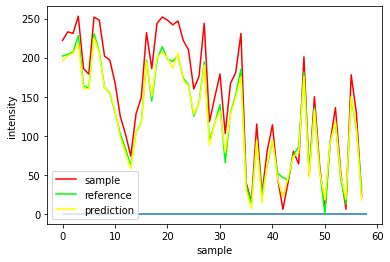

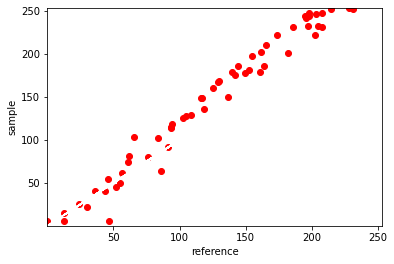

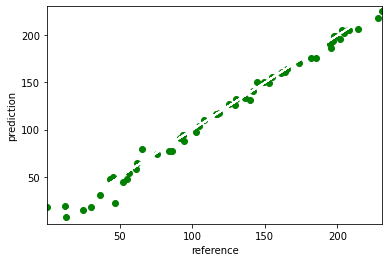

In [8]:
plot_prediction_error(rgb.R, rgb2.R, predictions.R)

## Green Value Error

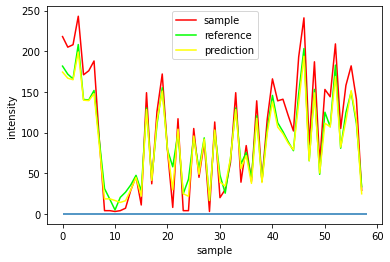

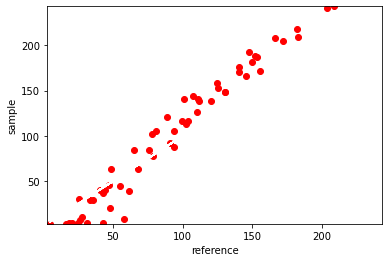

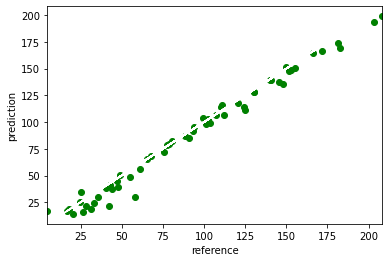

In [9]:
plot_prediction_error(rgb.G, rgb2.G,predictions.G)

## Blue Value Error

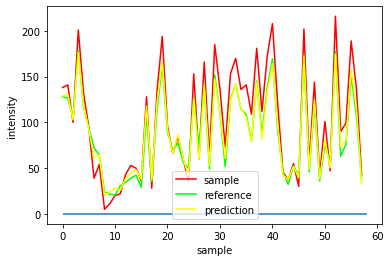

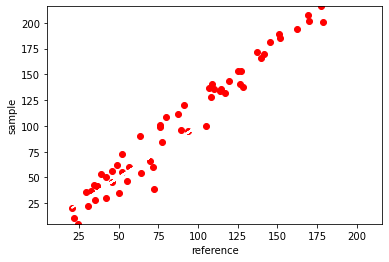

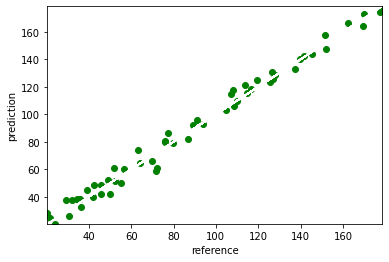

In [10]:
plot_prediction_error(rgb.B, rgb2.B,predictions.B)

# Plotting Results

## Sample RGB

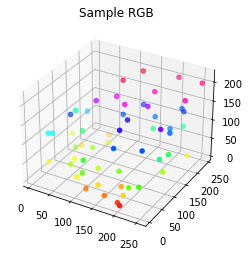

In [11]:
fig = plt.figure()
ax = plt.axes(projection="3d")
z_points = rgb.B
x_points = rgb.R
y_points = rgb.G
ax.scatter3D(x_points, y_points, z_points, c=z_points, cmap='hsv');
plt.title("Sample RGB")  
plt.show()

## Reference RGB

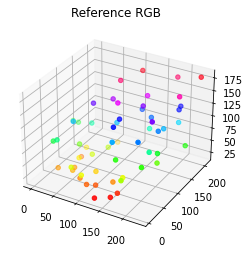

In [12]:
fig = plt.figure()
ax = plt.axes(projection="3d")
z_points = rgb2.B
x_points = rgb2.R
y_points = rgb2.G
ax.scatter3D(x_points, y_points, z_points, c=z_points, cmap='hsv');
plt.title("Reference RGB")  
plt.show()

## Prediction RGB

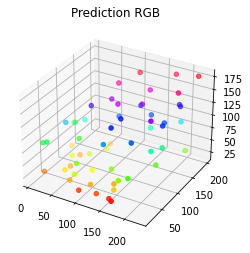

In [13]:
v = A.dot(rgb.T).T
predictions = pd.DataFrame(v, columns=['R', 'G', 'B'])

fig = plt.figure()
ax = plt.axes(projection="3d")

z_points = predictions.B
x_points = predictions.R
y_points = predictions.G
ax.scatter3D(x_points, y_points, z_points, c=z_points, cmap='hsv');
plt.title("Prediction RGB") 
plt.show()

## Prediction Error

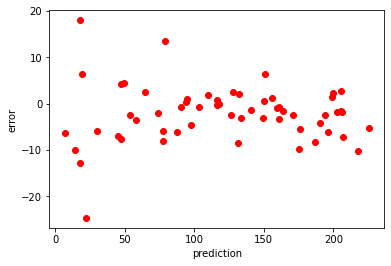

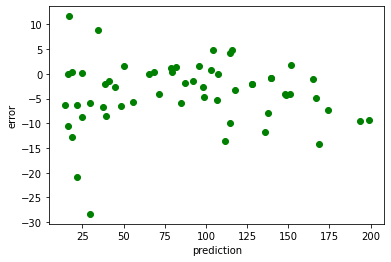

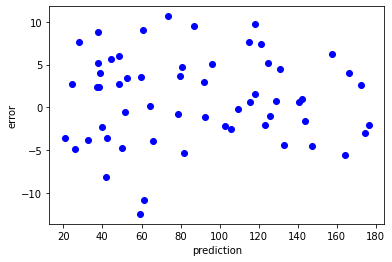

In [14]:
plot_prediction_errorR(predictions.R, predictions.R-rgb2.R)
plot_prediction_errorG(predictions.G, predictions.G-rgb2.G)
plot_prediction_errorB(predictions.B, predictions.B-rgb2.B)

# XYZ to Temperature

In [15]:
def LERP(a,b,c):
    a,b,c = float(a), float(b), float(c)
    if c==0: result=a
    elif c==1: result=b
    else: result=(b-a)*c+a
    return result

class UVT:
    def __init__(self, U,V,T):
        self.u=U
        self.v=V
        self.t=T

# reciprocal temperature (K)
rt = ['DBL_MIN',
        10.0e-6,  20.0e-6,  30.0e-6,  40.0e-6,  50.0e-6,
        60.0e-6,  70.0e-6,  80.0e-6,  90.0e-6, 100.0e-6,
        125.0e-6, 150.0e-6, 175.0e-6, 200.0e-6, 225.0e-6,
        250.0e-6, 275.0e-6, 300.0e-6, 325.0e-6, 350.0e-6,
        375.0e-6, 400.0e-6, 425.0e-6, 450.0e-6, 475.0e-6,
        500.0e-6, 525.0e-6, 550.0e-6, 575.0e-6, 600.0e-6]


uvt_list = [(0.18006, 0.26352, -0.24341),
            (0.18066, 0.26589, -0.25479),
            (0.18133, 0.26846, -0.26876),
            (0.18208, 0.27119, -0.28539),
            (0.18293, 0.27407, -0.30470),
            (0.18388, 0.27709, -0.32675),
            (0.18494, 0.28021, -0.35156),
            (0.18611, 0.28342, -0.37915),
            (0.18740, 0.28668, -0.40955),
            (0.18880, 0.28997, -0.44278),
            (0.19032, 0.29326, -0.47888),
            (0.19462, 0.30141, -0.58204),
            (0.19962, 0.30921, -0.70471),
            (0.20525, 0.31647, -0.84901),
            (0.21142, 0.32312, -1.0182),
            (0.21807, 0.32909, -1.2168),
            (0.22511, 0.33439, -1.4512),
            (0.23247, 0.33904, -1.7298),
            (0.24010, 0.34308, -2.0637),
            (0.24792, 0.34655, -2.4681), #	/* Note: 0.24792 is a corrected value for the error found in W&S as 0.24702
            (0.25591, 0.34951, -2.9641),
            (0.26400, 0.35200, -3.5814),
            (0.27218, 0.35407, -4.3633),
            (0.28039, 0.35577, -5.3762),
            (0.28863, 0.35714, -6.7262),
            (0.29685, 0.35823, -8.5955),
            (0.30505, 0.35907, -11.324),
            (0.31320, 0.35968, -15.628),
            (0.32129, 0.36011, -23.325),
            (0.32931, 0.36038, -40.770),
            (0.33724, 0.36051, -116.45)] #31

uvt = list(map(lambda tpl: UVT(*tpl), uvt_list))


def XYZtoCorColorTemp(xyz):
    if (xyz[0] < 1.0e-20) & (xyz[1] < 1.0e-20) & (xyz[2] < 1.0e-20):
        log = 'Error: protect against possible divide-by-zero failure'
        return None,log

    us = (4.0 * xyz[0])/(xyz[0] + 15.0 * xyz[1] + 3.0 * xyz[2])
    vs = (6.0 * xyz[1])/(xyz[0] + 15.0 * xyz[1] + 3.0 * xyz[2])
    dm = 0
    
    i=0
    while i < 32:
        if i == 31:
            log = 'Bad XYZ input, color temp would be less than minimum of 1666.7 degrees, or too far towards blue'
            return None, log
    
        di = (vs - uvt[i].v) - uvt[i].t * (us - uvt[i].u)
        if ((i > 0) & (((di < 0) & (dm >= 0)) | ((di >= 0) & (dm < 0)))):
            log = f'i={i}: Found lines bounding (us, vs) : i-1 and i'
            break
        dm = di
        i += 1
    
    di = di/np.sqrt(1 + uvt[i].t**2)
    dm = dm/np.sqrt(1 + uvt[i-1].t**2)
    p = dm/(dm-di)    # p = interpolation parameter, 0.0 : i-1, 1.0 : i
    p = 1/(LERP(rt[i-1], rt[i], p))
    temperature = round(p, 2)
    log = 'OK'
    return temperature, log

Example: (x,y,z) = (0.24, 0.5, 0.54)

In [16]:
print("Temperature: ")
XYZtoCorColorTemp((0.24,0.5,0.54))

Temperature: 


(12727.18, 'OK')